<a href="https://colab.research.google.com/github/Tejas163/DataScience-Deep-Learning-course/blob/master/fastai-lesson4_collab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from fastai.collab import *
from fastai.tabular import *

## Collaborative filtering example

`collab` models use data in a `DataFrame` of user, items, and ratings.

In [0]:
user,item,title = 'userId','movieId','title'

In [0]:
path = untar_data(URLs.ML_SAMPLE)
path

PosixPath('/root/.fastai/data/movie_lens_sample')

In [0]:
ratings = pd.read_csv(path/'ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,73,1097,4.0,1255504951
1,561,924,3.5,1172695223
2,157,260,3.5,1291598691
3,358,1210,5.0,957481884
4,130,316,2.0,1138999234


That's all we need to create and train a model:

In [0]:
data = CollabDataBunch.from_df(ratings, seed=42)

In [0]:
??CollabDataBunch

In [0]:
data

TabularDataBunch;

Train: LabelList (4825 items)
x: CollabList
userId 73; movieId 1097; ,userId 561; movieId 924; ,userId 157; movieId 260; ,userId 358; movieId 1210; ,userId 130; movieId 316; 
y: FloatList
4.0,3.5,3.5,5.0,2.0
Path: .;

Valid: LabelList (1206 items)
x: CollabList
userId 306; movieId 2628; ,userId 605; movieId 3793; ,userId 313; movieId 4886; ,userId 468; movieId 1136; ,userId 380; movieId 539; 
y: FloatList
3.0,2.0,4.5,4.0,1.5
Path: .;

Test: None

In [0]:
y_range = [0,5.5]

In [0]:
learn = collab_learner(data, n_factors=50, y_range=y_range)

In [0]:
??collab_learner

In [0]:
learn.fit_one_cycle(3, 5e-3)

epoch,train_loss,valid_loss,time
0,1.617621,0.940070,00:00
1,0.852462,0.666786,00:00
2,0.657814,0.664985,00:00


## Movielens 100k

Let's try with the full Movielens 100k data dataset, available from http://files.grouplens.org/datasets/movielens/ml-100k.zip

In [0]:
!wget http://files.grouplens.org/datasets/movielens/ml-100k.zip

--2019-12-30 06:13:54--  http://files.grouplens.org/datasets/movielens/ml-100k.zip
Resolving files.grouplens.org (files.grouplens.org)... 128.101.65.152
Connecting to files.grouplens.org (files.grouplens.org)|128.101.65.152|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4924029 (4.7M) [application/zip]
Saving to: ‘ml-100k.zip’

ml-100k.zip         100%[===================>]   4.70M  11.8MB/s    in 0.4s    

2019-12-30 06:13:54 (11.8 MB/s) - ‘ml-100k.zip’ saved [4924029/4924029]



In [0]:
!cp /content/ml-100k.zip /root/.fastai/data

In [0]:
path=Config.data_path()/'ml-100k'

In [0]:
path

PosixPath('/root/.fastai/data/ml-100k')

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
import zipfile
with zipfile.ZipFile('/content/ml-100k.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/ml-100k')

In [0]:
pwd

'/content'

In [0]:
path= "/content/ml-100k.zip"

In [0]:
unzip /content/ml-100k.zip

SyntaxError: ignored

In [0]:
path = untar_data("/root/.fastai/data/ml-100k.zip")

In [0]:
path="/content/ml-100k/ml-100k/u.data"

In [0]:
ratings = pd.read_csv(path, delimiter='\t', header=None,
                      names=[user,item,'rating','timestamp'])
ratings.head()

,userId,movieId,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [0]:
ps="/content/ml-100k/ml-100k/u.item"

In [0]:
movies = pd.read_csv(ps,  delimiter='|', encoding='latin-1', header=None,
                    names=[item, 'title', 'date', 'N', 'url', *[f'g{i}' for i in range(19)]])
movies.head()

,movieId,title,date,N,url,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0


In [0]:
len(ratings)

100000

In [0]:
rating_movie = ratings.merge(movies[[item, title]])
rating_movie.head()

,userId,movieId,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


<h2>CollabDataBunch is a class used for collaborative filtering</h2>

In [0]:
data = CollabDataBunch.from_df(rating_movie, seed=42, valid_pct=0.1, item_name=title)

In [0]:
data.show_batch()

userId,title,target
790,Batman Forever (1995),2.0
673,"Sweet Hereafter, The (1997)",5.0
495,"Seventh Seal, The (Sjunde inseglet, Det) (1957)",5.0
204,"Rainmaker, The (1997)",1.0
774,Trees Lounge (1996),3.0


In [0]:
??CollabDataBunch

In [0]:
y_range = [0,5.5]

<h2>now to apply the learning algorithm</h2>

In [0]:
learn = collab_learner(data, n_factors=40, y_range=y_range, wd=1e-1)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


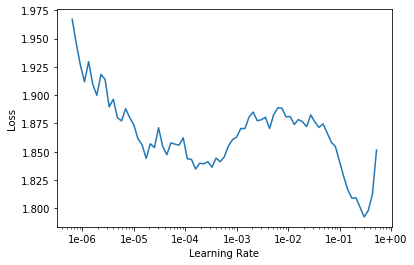

In [0]:
learn.lr_find()
learn.recorder.plot(skip_end=15)

In [0]:
learn.fit_one_cycle(5, 5e-3)

epoch,train_loss,valid_loss,time
0,0.939368,0.941436,00:09
1,0.866471,0.881397,00:09
2,0.765115,0.835557,00:09
3,0.660635,0.815898,00:09
4,0.564377,0.815765,00:09


In [0]:
learn.save('/content/dotprod-save1')

Here's [some benchmarks](https://www.librec.net/release/v1.3/example.html) on the same dataset for the popular Librec system for collaborative filtering. They show best results based on RMSE of 0.91, which corresponds to an MSE of `0.91**2 = 0.83`.

## Interpretation

### Setup

In [0]:
learn.load('/content/dotprod-save1');

In [0]:
learn.model

EmbeddingDotBias(
  (u_weight): Embedding(944, 40)
  (i_weight): Embedding(1654, 40)
  (u_bias): Embedding(944, 1)
  (i_bias): Embedding(1654, 1)
)

In [0]:
g = rating_movie.groupby(title)['rating'].count()
top_movies = g.sort_values(ascending=False).index.values[:1000]
top_movies[:10]

array(['Star Wars (1977)', 'Contact (1997)', 'Fargo (1996)', 'Return of the Jedi (1983)', 'Liar Liar (1997)',
       'English Patient, The (1996)', 'Scream (1996)', 'Toy Story (1995)', 'Air Force One (1997)',
       'Independence Day (ID4) (1996)'], dtype=object)

### Movie bias

In [0]:
movie_bias = learn.bias(top_movies, is_item=True)
movie_bias.shape

torch.Size([1000])

In [0]:
mean_ratings = rating_movie.groupby(title)['rating'].mean()
movie_ratings = [(b, i, mean_ratings.loc[i]) for i,b in zip(top_movies,movie_bias)]

In [0]:
item0 = lambda o:o[0]

In [0]:
sorted(movie_ratings, key=item0)[:15]

[(tensor(-0.3648),
  'Children of the Corn: The Gathering (1996)',
  1.3157894736842106),
 (tensor(-0.2963),
  'Lawnmower Man 2: Beyond Cyberspace (1996)',
  1.7142857142857142),
 (tensor(-0.2858), 'Mortal Kombat: Annihilation (1997)', 1.9534883720930232),
 (tensor(-0.2675), 'Striptease (1996)', 2.2388059701492535),
 (tensor(-0.2642), 'Cable Guy, The (1996)', 2.339622641509434),
 (tensor(-0.2431), 'Tales from the Hood (1995)', 2.037037037037037),
 (tensor(-0.2417), 'Thinner (1996)', 2.4489795918367347),
 (tensor(-0.2330), 'Crow: City of Angels, The (1996)', 1.9487179487179487),
 (tensor(-0.2313), 'Home Alone 3 (1997)', 1.894736842105263),
 (tensor(-0.2225), 'Free Willy 3: The Rescue (1997)', 1.7407407407407407),
 (tensor(-0.2216), "Joe's Apartment (1996)", 2.2444444444444445),
 (tensor(-0.2213), "Stephen King's The Langoliers (1995)", 2.413793103448276),
 (tensor(-0.2181), 'Grease 2 (1982)', 2.0),
 (tensor(-0.2155), 'Leave It to Beaver (1997)', 1.8409090909090908),
 (tensor(-0.2153), "

In [0]:
sorted(movie_ratings, key=lambda o: o[0], reverse=True)[:15]

[(tensor(0.6249), "Schindler's List (1993)", 4.466442953020135),
 (tensor(0.5839), 'Shawshank Redemption, The (1994)', 4.445229681978798),
 (tensor(0.5710), 'Titanic (1997)', 4.2457142857142856),
 (tensor(0.5659), 'L.A. Confidential (1997)', 4.161616161616162),
 (tensor(0.5509), 'Silence of the Lambs, The (1991)', 4.28974358974359),
 (tensor(0.5336), 'As Good As It Gets (1997)', 4.196428571428571),
 (tensor(0.5304), 'Rear Window (1954)', 4.3875598086124405),
 (tensor(0.5273), 'Star Wars (1977)', 4.3584905660377355),
 (tensor(0.4926), 'Vertigo (1958)', 4.251396648044692),
 (tensor(0.4863), 'Casablanca (1942)', 4.45679012345679),
 (tensor(0.4835), 'Usual Suspects, The (1995)', 4.385767790262173),
 (tensor(0.4773), 'Good Will Hunting (1997)', 4.262626262626263),
 (tensor(0.4643), 'Boot, Das (1981)', 4.203980099502488),
 (tensor(0.4557), 'Godfather, The (1972)', 4.283292978208232),
 (tensor(0.4531), 'Close Shave, A (1995)', 4.491071428571429)]

### Movie weights

In [0]:
movie_w = learn.weight(top_movies, is_item=True)
movie_w.shape

torch.Size([1000, 40])

In [0]:
movie_pca = movie_w.pca(3)
movie_pca.shape

torch.Size([1000, 3])

In [0]:
fac0,fac1,fac2 = movie_pca.t()
movie_comp = [(f, i) for f,i in zip(fac0, top_movies)]

In [0]:
sorted(movie_comp, key=itemgetter(0), reverse=True)[:10]

[(tensor(1.1220), 'Chinatown (1974)'),
 (tensor(1.0762), 'Close Shave, A (1995)'),
 (tensor(1.0561), 'Wrong Trousers, The (1993)'),
 (tensor(1.0441), 'Casablanca (1942)'),
 (tensor(1.0251), 'When We Were Kings (1996)'),
 (tensor(1.0227), 'Persuasion (1995)'),
 (tensor(0.9710), 'Wallace & Gromit: The Best of Aardman Animation (1996)'),
 (tensor(0.9655), 'Lawrence of Arabia (1962)'),
 (tensor(0.9634),
  'Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1963)'),
 (tensor(0.9533), 'Third Man, The (1949)')]

In [0]:
sorted(movie_comp, key=itemgetter(0))[:10]

[(tensor(-1.1833), 'D3: The Mighty Ducks (1996)'),
 (tensor(-1.1789), 'Jungle2Jungle (1997)'),
 (tensor(-1.1633), 'Children of the Corn: The Gathering (1996)'),
 (tensor(-1.1393), "McHale's Navy (1997)"),
 (tensor(-1.1217), 'Home Alone 3 (1997)'),
 (tensor(-1.1114), 'Congo (1995)'),
 (tensor(-1.0631), 'Leave It to Beaver (1997)'),
 (tensor(-1.0412), 'Mortal Kombat: Annihilation (1997)'),
 (tensor(-1.0391), 'Batman & Robin (1997)'),
 (tensor(-1.0122), 'Free Willy 3: The Rescue (1997)')]

In [0]:
movie_comp = [(f, i) for f,i in zip(fac1, top_movies)]

In [0]:
sorted(movie_comp, key=itemgetter(0), reverse=True)[:10]

[(tensor(1.0093), 'Ready to Wear (Pret-A-Porter) (1994)'),
 (tensor(0.8869), 'Keys to Tulsa (1997)'),
 (tensor(0.8551), 'Nosferatu (Nosferatu, eine Symphonie des Grauens) (1922)'),
 (tensor(0.8494), 'Stupids, The (1996)'),
 (tensor(0.8381), 'Trainspotting (1996)'),
 (tensor(0.8282), 'Dead Man (1995)'),
 (tensor(0.7759), 'Jude (1996)'),
 (tensor(0.7693), 'Beavis and Butt-head Do America (1996)'),
 (tensor(0.7688), 'Very Brady Sequel, A (1996)'),
 (tensor(0.7445), 'Sweet Hereafter, The (1997)')]

In [0]:
sorted(movie_comp, key=itemgetter(0))[:10]

[(tensor(-1.1846), 'Braveheart (1995)'),
 (tensor(-1.0403), 'Titanic (1997)'),
 (tensor(-0.9899), 'Raiders of the Lost Ark (1981)'),
 (tensor(-0.8923), 'Pretty Woman (1990)'),
 (tensor(-0.8768), 'Independence Day (ID4) (1996)'),
 (tensor(-0.8713), 'American President, The (1995)'),
 (tensor(-0.8706), 'Sleepless in Seattle (1993)'),
 (tensor(-0.8613), "It's a Wonderful Life (1946)"),
 (tensor(-0.8595), "Mr. Holland's Opus (1995)"),
 (tensor(-0.8309), 'Star Wars (1977)')]

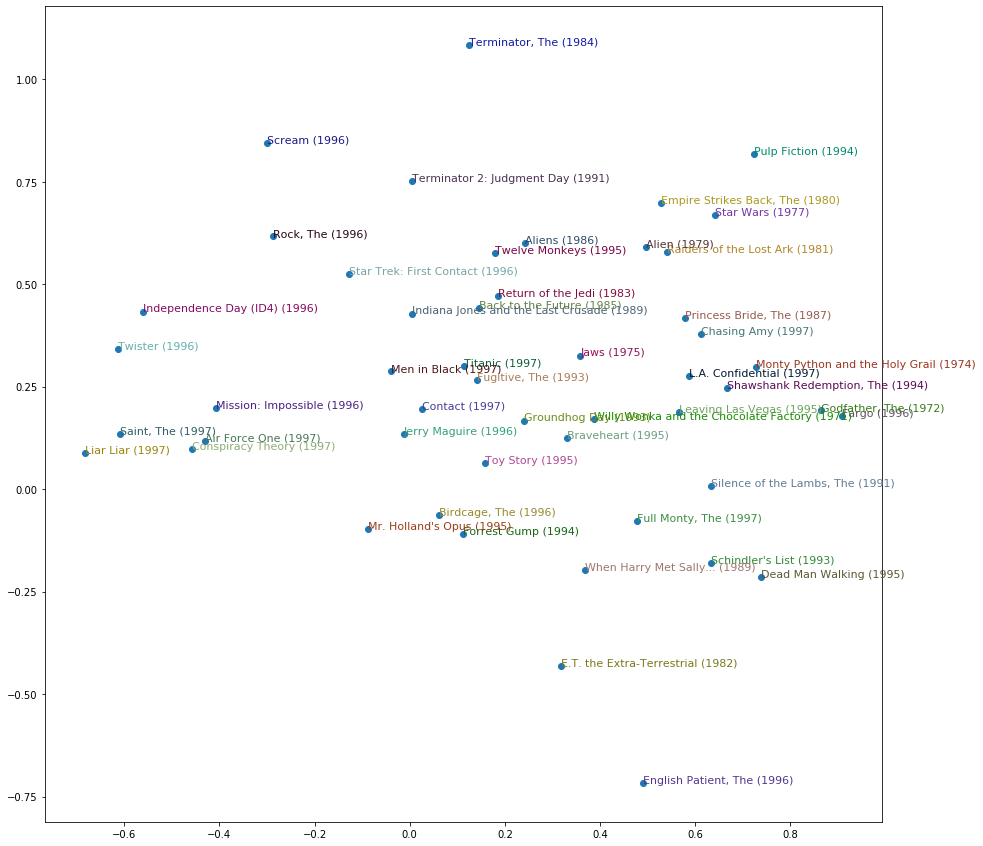

In [0]:
idxs = np.random.choice(len(top_movies), 50, replace=False)
idxs = list(range(50))
X = fac0[idxs]
Y = fac2[idxs]
plt.figure(figsize=(15,15))
plt.scatter(X, Y)
for i, x, y in zip(top_movies[idxs], X, Y):
    plt.text(x,y,i, color=np.random.rand(3)*0.7, fontsize=11)
plt.show()